# Table of Contents

0. Introduction
   
1. Load the dataset  
   1.1. categorical value를 encoding하기  
   1.2. target labeling 수정하기  
   1.3. Re-labeling  
   1.4. Convert to Sequential Dataset  
   1.5. one-hot encoding

2. LSTM; Long Short Term Memory

# 0. Introduction

**Dataset**  
* [abalone(전복)](https://github.com/MyungKyuYi/AI-class/blob/main/abalone.csv)

**Environment**
* macOS `x86`cpu

**Framework**  
* TensorFlow: Version `2.10.0`

**Dependencies**  
* Python: Version `3.9.19`
* Numpy: Version `1.24.3`
* Pandas: Version `2.2.2`
* Matplotlib: Version `3.9.2`
* scikit-learn: Version `1.2.2`

**Purpose**  
* abalone dataset에 대해서 LSTM을 사용한 Classification을 수행한다.

**Abstraction**  
* d

# 1. Load the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('./datasets/abalone.csv', index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [3]:
print(f"df.shape: {df.shape}")
print(f"df.columns: {df.columns}")

df.shape: (4177, 9)
df.columns: Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')


In [4]:
# features description
'''
Sex              | M, F, and I(infant)          | 수컷, 암컷, 미성숙함(구분 불가)
Length           | Longest shell measurement    | 껍질의 장축 길이
Diameter         | perpendicular to length      | 껍질의 단축 길이
Height           | with meat in shell           | 높이(껍질 외에도 살 부분을 포함)
Whole_weight     | whole abalone                | 껍질 + 살 무게
Shucked_weight   | weight of meat               | 껍질을 제외한 살 무게
Viscera_weight   | gut weight(after bleeding)   | 피를 뺀 후의 내장 무게
Shell_weight     | after being dried            | 건조 후의 껍질 무게
Rings            | +1.5 gives the age in years  | 껍질의 ring의 수, 1.5를 곱하면 실제 나이
'''

'\nSex              | M, F, and I(infant)          | 수컷, 암컷, 미성숙함(구분 불가)\nLength           | Longest shell measurement    | 껍질의 장축 길이\nDiameter         | perpendicular to length      | 껍질의 단축 길이\nHeight           | with meat in shell           | 높이(껍질 외에도 살 부분을 포함)\nWhole_weight     | whole abalone                | 껍질 + 살 무게\nShucked_weight   | weight of meat               | 껍질을 제외한 살 무게\nViscera_weight   | gut weight(after bleeding)   | 피를 뺀 후의 내장 무게\nShell_weight     | after being dried            | 건조 후의 껍질 무게\nRings            | +1.5 gives the age in years  | 껍질의 ring의 수, 1.5를 곱하면 실제 나이\n'

In [5]:
# missing value를 확인하는 방법 두 가지
# sol1. DataFrame.info()는 Non-Null Count & Dtype을 리턴함
print(df.info())
print("\n\n")
# sol2. DataFrame.isnull().sum()은 Null Count를 리턴함 -> Null 확인에는 더 직관적임
print(df.isnull().sum())
print("\n\n")

# 또한 이를 응용하여 dataset 전체에 null이 존재하는지 여부를 출력하는 if statement를 작성 가능
if (df.isnull().sum().sum() == 0): print("There are no missing values.")
print("\n\n")

# 또한 이를 응용하여 null이 존재한다면 자동으로 처리하는 if statement를 작성 가능
# 해당 예제에서는 missing value를 '제거'하도록 작성함. 이외에도 missing value 처리 방법은 다양함
if (df.isnull().sum().sum() == 0):
    print("There are no missing values.")
else:
    print("missing values가 존재하여 처리합니다. \n처리 방법: 삭제")
    df = df.dropna()

# 해당 dataset에는 missing value가 존재하지 않기 때문에 별도로 작동하지는 않음

<class 'pandas.core.frame.DataFrame'>
Index: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.3+ KB
None



Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64



There are no missing values.



There are no missing values.


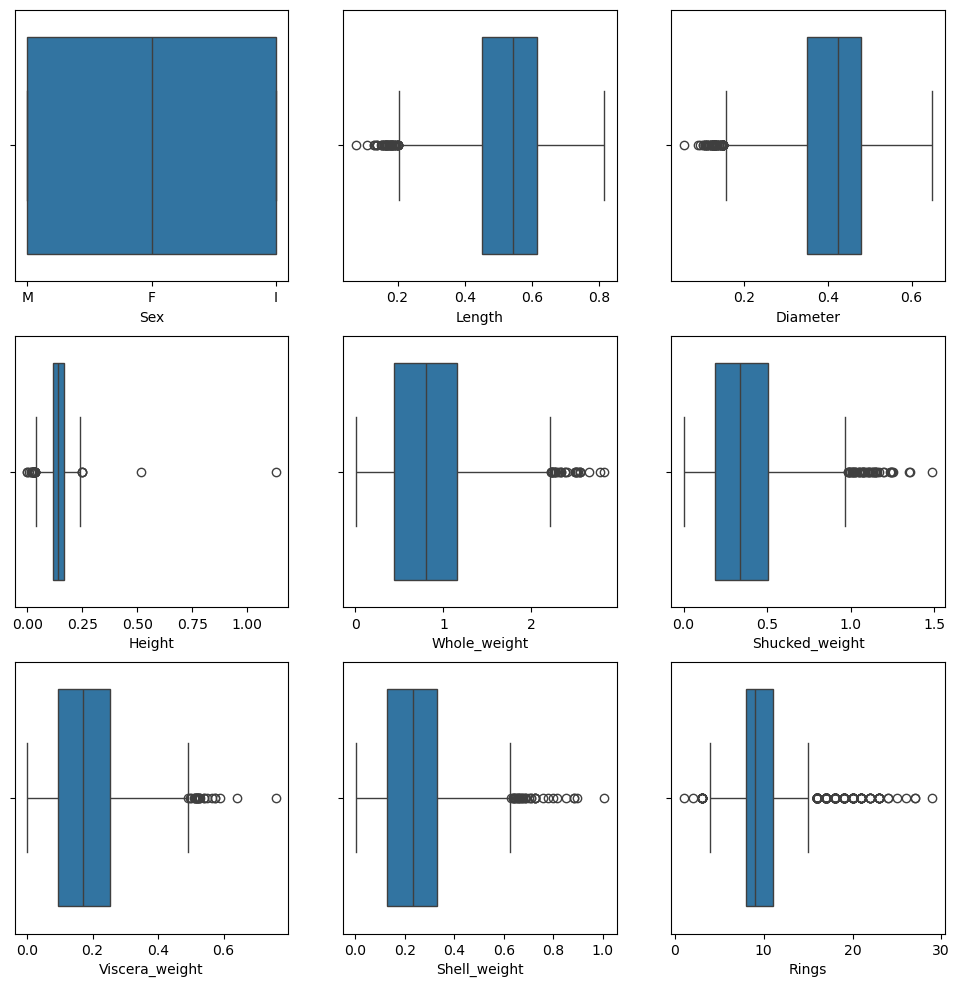

In [6]:
# 각 column에 대한 boxplot plotting
columns = df.columns
figure = plt.figure(figsize=(12, 12))
cols, rows = 3, 3
idx = 1

for column in columns:
    # 이 아래로는 각 subplot에 개별로 적용됨
    figure.add_subplot(rows, cols, idx) # rows by cols의 idx번 째 
    sns.boxplot(data=df, x=column)
    idx += 1

plt.show()

## 1.1. categorical value를 encoding하기

In [7]:
# categorical value를 가지는 column 확인
np.unique(df['Sex'])

array(['F', 'I', 'M'], dtype=object)

In [8]:
# 위에서 'Sex'에 null이 없음을 확인했으니 mapping하여 encoding한다.
sex_mapping = {'M': 0, 'F': 1, 'I': 2}
df['Sex'] = df['Sex'].map(sex_mapping)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [9]:
# DataFrame.describe()는 dataset에 대한 statistical values를 제공함
df.describe()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


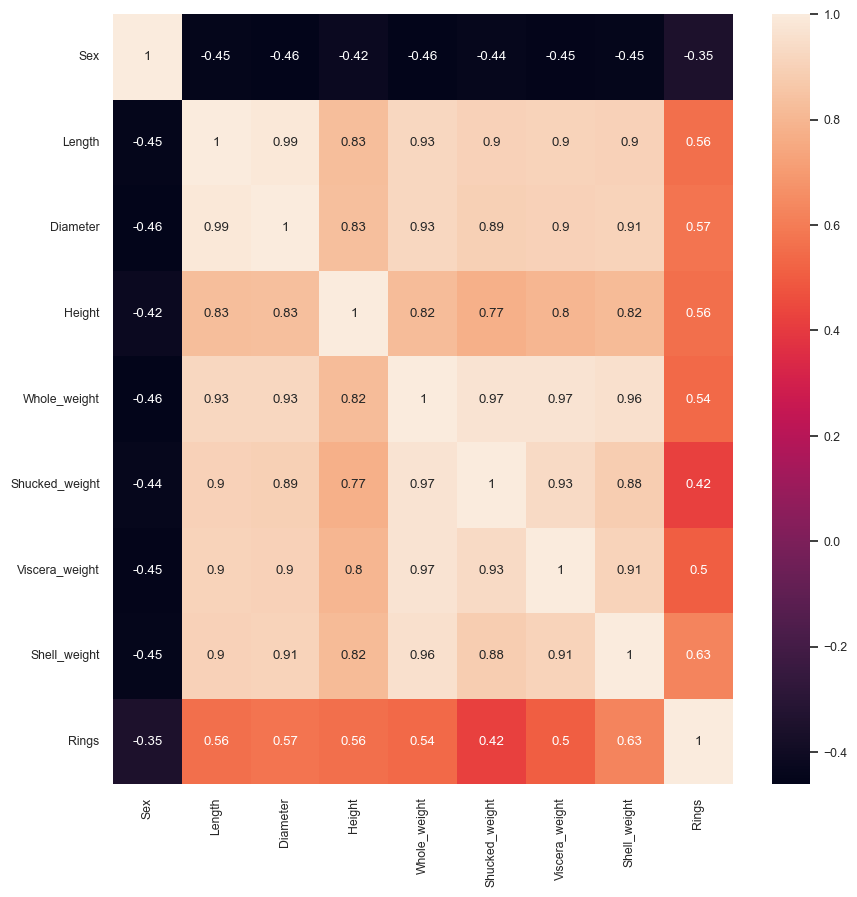

In [10]:
# Check the correlations(1) by heatmap
# If corr >= 0.3, positive-correlated and if corr >= 0.7, high correlated
# If corr <= -0.3, negative-correlated and if corr <= -0.7, high correlated
df_corr = df.corr()

plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(data=df_corr, annot=True)
plt.show()

In [11]:
# # # Check the correlations(2) by pairplot
#   # 'Rings'에 대해 구분
# sns.pairplot(data=df,
#              vars=['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
#                    'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
#              hue='Rings')
# plt.show()

In [12]:
# # # Check the correlations(2) by pairplot
#   # 'Sex'에 대해 구분
# sns.pairplot(data=df,
#              vars=['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
#                    'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
#              hue='Sex')
# plt.show()

## 1.2. target labeling 수정하기

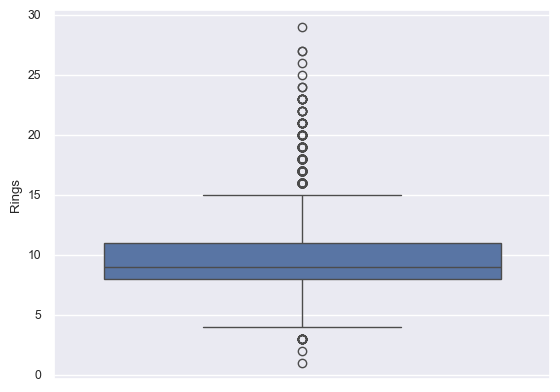

In [13]:
# label 확인(1)
sns.boxplot(data=df['Rings'])
plt.show()

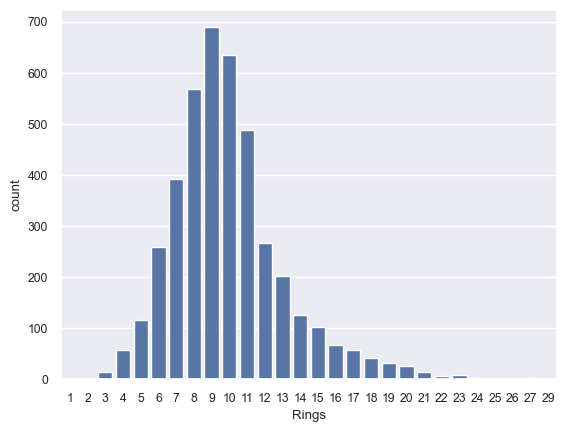

In [14]:
# label 확인(2)
sns.countplot(data=df, x='Rings')
plt.show()

In [15]:
# label 확인(3)
labels = np.unique(df['Rings'], return_counts=True)
print("\n<label count>")
table = np.vstack(labels).T
print("Rings  count")
for row in table:
    print(f"{row[0]:5d} {row[1]:6d}")

# problem 1. label이 0부터 시작하지 않는다.
# problem 2. label에 빈 공간이 있다(28).


<label count>
Rings  count
    1      1
    2      1
    3     15
    4     57
    5    115
    6    259
    7    391
    8    568
    9    689
   10    634
   11    487
   12    267
   13    203
   14    126
   15    103
   16     67
   17     58
   18     42
   19     32
   20     26
   21     14
   22      6
   23      9
   24      2
   25      1
   26      1
   27      2
   29      1


In [16]:
# labeling 수정 전 데이터 저장 로직(1)
tmp_list = []
tmp_list.append("<label count>")
tmp_list.append("Rings  count")
for row in table:
    tmp_list.append((f"{row[0]:5d} {row[1]:6d}"))

# 저장 로직 확인용 출력
tmp_list

['<label count>',
 'Rings  count',
 '    1      1',
 '    2      1',
 '    3     15',
 '    4     57',
 '    5    115',
 '    6    259',
 '    7    391',
 '    8    568',
 '    9    689',
 '   10    634',
 '   11    487',
 '   12    267',
 '   13    203',
 '   14    126',
 '   15    103',
 '   16     67',
 '   17     58',
 '   18     42',
 '   19     32',
 '   20     26',
 '   21     14',
 '   22      6',
 '   23      9',
 '   24      2',
 '   25      1',
 '   26      1',
 '   27      2',
 '   29      1']

In [17]:
# labeling 수정 전 데이터 저장 로직(2)
with open('./abalone_label_numbering_origin.txt', 'w') as f:
    for line in tmp_list:
        f.write(line)
        f.write('\n')

In [18]:
# labeling 수정 - step1. 29 -> 28
rings_mapping = {29: 28}

df['Rings'] = df['Rings'].replace(rings_mapping)
np.unique(df['Rings'])

# 이제 1 ~ 28 까지는 빈 클래스 없이 존재한다
# 남은 문제는 0이 존재하지 않는다는 것, 따라서 0 ~ 27로 매핑 필요함(다음 cell)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [19]:
# labeling 수정 - step2. 1~28 -> 0~27
rings_mapping = {}
for i in range(len(np.unique(df['Rings']))): # 0 ~ 27
    rings_mapping = {i+1: i} # 1을 0에 매핑, 2를 1에 매핑, ...
    # ㄴ mapping dict에 한 번에 추가하고 replace하면 2에서 1로 매핑된 애가
    # ㄴ 또 1에서 0으로 매핑되는 문제가 생기지 않을까 싶어서 매 번 초기화하고
    # ㄴ loop마다 한 개의 label에 대한 mapping만 수행되도록 했음
    # ㄴ 하지만 알고보니 다음과 같다고 함.
    #   ㄴ 매핑 순서가 상관없이 모든 값이 딕셔너리에 정의된 대로 바뀌며, 
    #   ㄴ 한 번 바뀐 값은 다시 변경되지 않습니다.
    df['Rings'] = df['Rings'].replace(rings_mapping)

labels = np.unique(df['Rings'], return_counts=True)
print("\n<label count>")
table = np.vstack(labels).T
print("Rings  count")
for row in table:
    print(f"{row[0]:5d} {row[1]:6d}")

# success


<label count>
Rings  count
    0      1
    1      1
    2     15
    3     57
    4    115
    5    259
    6    391
    7    568
    8    689
    9    634
   10    487
   11    267
   12    203
   13    126
   14    103
   15     67
   16     58
   17     42
   18     32
   19     26
   20     14
   21      6
   22      9
   23      2
   24      1
   25      1
   26      2
   27      1


## 1.3. Re-labeling

In [20]:
# 위에서 확인했듯이 label에 대한 sampling bias가 심함
# 이를 개선하기 위해서 총 28종류의 label을 5개 범위로 나눠서 re-labeling
label_mapping = {}
for i in range(28):
    if i < 5:
        label_mapping[i] = 0
    elif i < 10:
        label_mapping[i] = 1
    elif i < 15:
        label_mapping[i] = 2
    elif i < 20:
        label_mapping[i] = 3
    else:
        label_mapping[i] = 4

df['Rings'] = df['Rings'].replace(label_mapping)

re_labels = np.unique(df['Rings'], return_counts=True)
print("\n<label count>")
table = np.vstack(re_labels).T
print("Rings  count")
for row in table:
    print(f"{row[0]:5d} {row[1]:6d}")


<label count>
Rings  count
    0    189
    1   2541
    2   1186
    3    225
    4     36


## 1.4. Convert to Sequential Dataset

In [21]:
# X, y 분리
X = df.drop('Rings', axis=1).to_numpy()
y = df['Rings'].to_numpy()

print(f"X.head(): \n{X[:5]} \n")
print(f"y.head(): \n{y[:5]}")

X.head(): 
[[0.     0.455  0.365  0.095  0.514  0.2245 0.101  0.15  ]
 [0.     0.35   0.265  0.09   0.2255 0.0995 0.0485 0.07  ]
 [1.     0.53   0.42   0.135  0.677  0.2565 0.1415 0.21  ]
 [0.     0.44   0.365  0.125  0.516  0.2155 0.114  0.155 ]
 [2.     0.33   0.255  0.08   0.205  0.0895 0.0395 0.055 ]] 

y.head(): 
[2 1 1 1 1]


In [22]:
# train, test 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=42)

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (3132, 8)
X_test.shape: (1045, 8)
y_train.shape: (3132,)
y_test.shape: (1045,)


In [23]:
# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Sequential dataset 만들기(1)
from collections import Counter

def split_sequences_classification_majority(data, labels, n_steps):
    """
    비연속 데이터셋을 일정한 길이의 연속적인 시퀀스로 변환하는 함수
    window에서 다수를 차지하는 label로 결정
    
    Args:
    data: 원본 데이터 (리스트 또는 배열)
    labels: 각 데이터에 해당하는 클래스 라벨 (리스트 또는 배열)
    n_steps: 시퀀스의 길이 (정수)
    
    Returns:
    X: 입력 시퀀스
    y: 해당 시퀀스에 대한 다수 라벨
    """
    X, y = [], []
    
    for i in range(len(data) - n_steps + 1):
        # 시퀀스 추출
        seq_x = data[i:i + n_steps]
        seq_labels = labels[i:i + n_steps]
        
        # 시퀀스의 라벨 중 가장 빈번한 라벨을 선택 (다수결)
        most_common_label = Counter(seq_labels).most_common(1)[0][0]
        
        X.append(seq_x)
        y.append(most_common_label)
    
    return np.array(X), np.array(y)

In [25]:
# Sequential dataset 만들기(2)
n_steps = 5 # 전복 5마리를 한 개의 set으로 묶기
X_train_seq, y_train_seq = split_sequences_classification_majority(X_train,
                                                                   y_train,
                                                                   n_steps)

X_test_seq, y_test_seq = split_sequences_classification_majority(X_test,
                                                                 y_test,
                                                                 n_steps)

print(f"X_train_seq.shape: {X_train_seq.shape}", end=" ")
print(f"y_train_seq.shape: {y_train_seq.shape}")
print(f"X_test_seq.shape: {X_test_seq.shape}", end=" ")
print(f"y_test_seq.shape: {y_test_seq.shape}")

X_train_seq.shape: (3128, 5, 8) y_train_seq.shape: (3128,)
X_test_seq.shape: (1041, 5, 8) y_test_seq.shape: (1041,)


In [26]:
n_steps = X_train_seq.shape[1]
features = X_train_seq.shape[2]

## 1.5. one-hot encoding

In [27]:
import tensorflow as tf

y_train_seq_onehot = tf.keras.utils.to_categorical(y_train_seq)
y_test_seq_onehot = tf.keras.utils.to_categorical(y_test_seq)

print("==== one-hot encoded ====")
print(f"y_train_seq_onehot.shape {y_train_seq_onehot.shape}")
print(f"y_train_seq_onehot.head() \n{y_train_seq_onehot[:5]}")
print()
print(f"y_test_seq_onehot.shape {y_test_seq_onehot.shape}")
print(f"y_test_seq_onehot.head() \n{y_test_seq_onehot[:5]}")

# 위에서 majority algorithm을 사용해서 label 5가 아예 사라져버림.
# 그렇다고 once algorithm을 사용하면 accuracy가 너무 낮게 나올 것 같은데...

2024-09-25 23:11:30.841674: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


==== one-hot encoded ====
y_train_seq_onehot.shape (3128, 5)
y_train_seq_onehot.head() 
[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]

y_test_seq_onehot.shape (1041, 5)
y_test_seq_onehot.head() 
[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [28]:
# solution 2
'''
def one_hot_encoding(label_array):
    label_length = len(label_array)
    label_array_onehot = []
    for i in range(label_length):
        # Output: [[0, 0, ..., 0], [0, 0, ..., 0], ...]
        label_array_onehot.append([0] * len(np.unique(label_array)))

    for j in range(label_length):
        hot_idx = int(label_array[j])        # 각 label에 맞는 자리 탐색
        label_array_onehot[j][hot_idx] = 1   # 탐색한 자리에 1 채우기

    return np.array(label_array_onehot)
'''

'\ndef one_hot_encoding(label_array):\n    label_length = len(label_array)\n    label_array_onehot = []\n    for i in range(label_length):\n        # Output: [[0, 0, ..., 0], [0, 0, ..., 0], ...]\n        label_array_onehot.append([0] * len(np.unique(label_array)))\n\n    for j in range(label_length):\n        hot_idx = int(label_array[j])        # 각 label에 맞는 자리 탐색\n        label_array_onehot[j][hot_idx] = 1   # 탐색한 자리에 1 채우기\n\n    return np.array(label_array_onehot)\n'

# 2. LSTM; Long Short Term Memory

In [29]:
import tensorflow as tf
import tensorflow.keras as keras

In [30]:
# Create the model
model = keras.models.Sequential()

# Add the layers to model
# model.add(keras.layers.BatchNormalization())
model.add(keras.layers.LSTM(units=128,
                            activation='relu',
                            input_shape=(n_steps, features),
                            name='lstm'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(units=128,
                             activation='relu',
                             name='dense1'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(units=5,
                             activation='softmax',
                             name='output'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               70144     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense1 (Dense)              (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 output (Dense)              (None, 5)                 645       
                                                        

2024-09-25 23:11:33.543520: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
epochs = 50
history = model.fit(X_train_seq, y_train_seq_onehot,
                    batch_size=32,
                    validation_split=0.1,
                    shuffle=True,
                    verbose=2,
                    epochs=epochs)

Epoch 1/50
88/88 - 2s - loss: 0.9206 - accuracy: 0.6650 - val_loss: 1.1210 - val_accuracy: 0.7093 - 2s/epoch - 20ms/step
Epoch 2/50
88/88 - 0s - loss: 0.6436 - accuracy: 0.7631 - val_loss: 0.9225 - val_accuracy: 0.7093 - 279ms/epoch - 3ms/step
Epoch 3/50
88/88 - 0s - loss: 0.5833 - accuracy: 0.7769 - val_loss: 0.7619 - val_accuracy: 0.7093 - 272ms/epoch - 3ms/step
Epoch 4/50
88/88 - 0s - loss: 0.5789 - accuracy: 0.7684 - val_loss: 0.6934 - val_accuracy: 0.7093 - 280ms/epoch - 3ms/step
Epoch 5/50
88/88 - 0s - loss: 0.5453 - accuracy: 0.7854 - val_loss: 0.6602 - val_accuracy: 0.7093 - 274ms/epoch - 3ms/step
Epoch 6/50
88/88 - 0s - loss: 0.5383 - accuracy: 0.7783 - val_loss: 0.6310 - val_accuracy: 0.7157 - 269ms/epoch - 3ms/step
Epoch 7/50
88/88 - 0s - loss: 0.5267 - accuracy: 0.7865 - val_loss: 0.6410 - val_accuracy: 0.7252 - 275ms/epoch - 3ms/step
Epoch 8/50
88/88 - 0s - loss: 0.5360 - accuracy: 0.7815 - val_loss: 0.6110 - val_accuracy: 0.7220 - 274ms/epoch - 3ms/step
Epoch 9/50
88/88 -

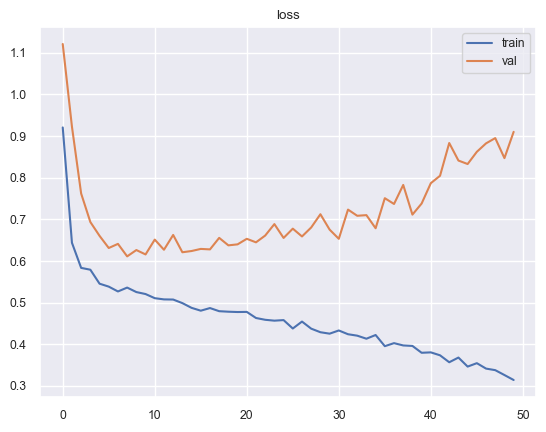

In [33]:
# epoch에 따른 loss
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label = 'train')
plt.plot(val_loss, label = 'val')
plt.title('loss')
plt.legend() # 우측 상단에 그래프 정보 띄워주는 거
plt.show()

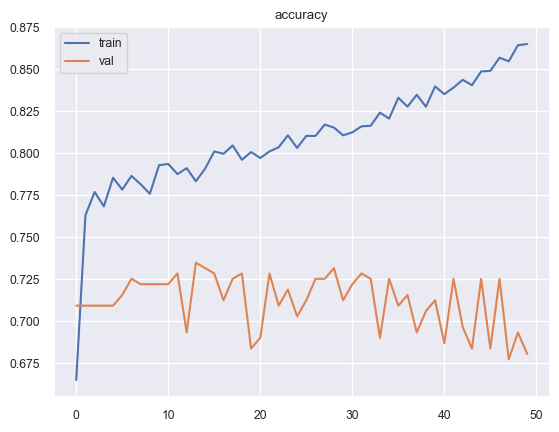

In [34]:
# epoch에 따른 accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc, label = 'train')
plt.plot(val_acc, label = 'val')
plt.title('accuracy')
plt.legend() # 우측 상단에 그래프 정보 띄워주는 거
plt.show()

In [35]:
# evaluate the model - train
model.evaluate(X_train_seq, y_train_seq_onehot)

98/98 [==============================] - 0s 2ms/step - loss: 0.3043 - accuracy: 0.8846


[0.30429378151893616, 0.8845908045768738]

In [36]:
# evaluate the model - test
model.evaluate(X_test_seq, y_test_seq_onehot)

33/33 [==============================] - 0s 2ms/step - loss: 0.8258 - accuracy: 0.7416


[0.8257710337638855, 0.7415946125984192]

In [37]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [38]:
# classification report
y_pred = model.predict(X_test_seq)
print(f"y_pred.head() \n{y_pred[:5]}")

y_pred_class = np.argmax(y_pred, axis=1)
print(f"y_pred_class.head() \n{y_pred_class[:5]}")

y_test_class = np.argmax(y_test_seq_onehot, axis=1)
print(f"y_test_class.head() \n{y_test_class[:5]}")

print()
print(classification_report(y_test_class, y_pred_class))

# print(confusion_matrix(y_test_class, y_pred_class))

33/33 [==============================] - 0s 2ms/step
y_pred.head() 
[[7.3669203e-06 7.6025450e-01 2.3935562e-01 3.7481502e-04 7.6664364e-06]
 [3.8002579e-06 5.9088600e-01 4.0781915e-01 1.2826429e-03 8.3849891e-06]
 [1.7349315e-05 3.9854017e-01 6.0000622e-01 1.4135744e-03 2.2631202e-05]
 [7.6684933e-05 3.4262520e-01 6.5538520e-01 1.8407544e-03 7.2111005e-05]
 [2.0214140e-05 2.9375899e-01 7.0494562e-01 1.1982240e-03 7.6868833e-05]]
y_pred_class.head() 
[1 1 2 2 2]
y_test_class.head() 
[2 2 2 2 2]

              precision    recall  f1-score   support

           0       0.31      0.40      0.35        10
           1       0.82      0.87      0.84       811
           2       0.38      0.32      0.34       202
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00         2

    accuracy                           0.74      1041
   macro avg       0.30      0.32      0.31      1041
weighted avg       0.72      0.74      0.73      1041



/opt/anaconda3/envs/gc_dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/gc_dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/gc_dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix


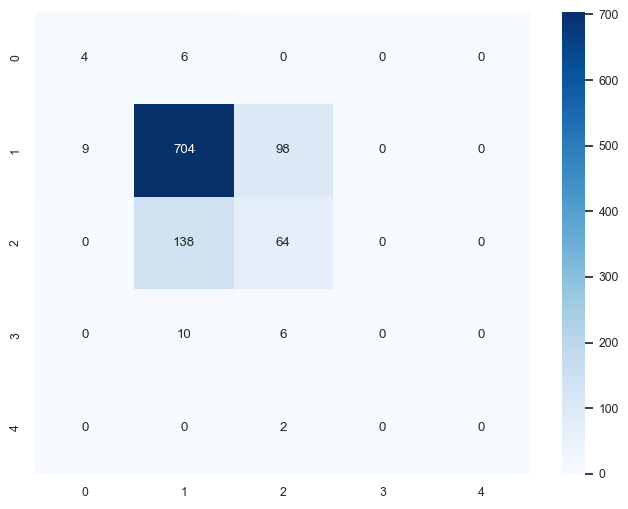

In [39]:
# confusion matrix
print('Confusion Matrix')
cm = confusion_matrix(y_test_class, y_pred_class)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()